# Exploring School

> Exploring school dataset with siuba, plotnine and geopandas 

- toc: false 
- show_description: true
- badges: true
- comments: true
- author: Vibek Raj Maurya
- show_image: https://res.cloudinary.com/rvibek-com-np/image/upload/v1627976294/vjzaqwfhwa7ytrpebcyi.png
- categories: [fastpages, jupyter, siuba, plotnine, geopandas]

In [1]:
import pandas as pd
from plotnine import *

from siuba import *

import geopandas as gpd


In [2]:
#collapse-show
schools = pd.read_csv('https://gist.githubusercontent.com/rvibek/11d79460fb03b3d8829275d924b832e4/raw/f643e93b3d3f46facab2140ab035d351411d26b4/gistfile0.txt')
schools.head()

,ID,SchoolName,Male_EGY,Female_EGY,Total_EGY,Male_Syrian,Female_Syrian,Total_Syrian,Lat,Lng
0,1017308,ف رياض الاطفال بمدرسةشبرا القديمة ب,42,51,93,1,0,1,30.035539,31.271526
1,1022697,ثمرة الاخلاص بنون,91,0,91,2,0,2,30.077346,31.232600
2,1031379,السيدة رقية,244,245,489,1,2,3,30.104255,31.245600
3,1031294,الاشراف,186,167,353,2,1,3,30.100513,31.250606
4,1033455,فاطمة النبوية,421,350,771,1,0,1,30.090416,31.246074


In [3]:
schools.Total_Syrian.sum()/schools.Total_EGY.sum()

0.011432301692248464

## Background

In ~500 schools in Egypt, 1.14% of the total students are Syrians. According to datasets, in 491 schools there are schools.Total_EGY.sum() Egyptian students and  schools.Total_Syrian.sum() Syrian students.

The following notebook shows the distribution of the schools and  the students.

In [4]:
#collapse-hide
print(f'In ~500 schools in Egypt, 1.14% of the total students are Syrians. According to datasets, in 491 shools there are {schools.Total_EGY.sum()} Egyptian students and {schools.Total_Syrian.sum()} Syrian students.\n\nThe following notebook shows the distribution of the schools and the students.')

In ~500 schools in Egypt, 1.14% of the total students are Syrians. According to datasets, in 491 shools there are 477944 Egyptian students and 5464 Syrian students.

The following notebook shows the distribution of the schools and the students.


In [5]:
schools_reshp = (
schools 
    >> select(_.SchoolName, _.Lat, _.Lng, _.Total_EGY, _.Total_Syrian)
    >> gather('measure', 'value', -_.Lng, -_.Lat,  -_.SchoolName)
)
schools_reshp.sort_values(by='value', inplace=True)

In [6]:
egypt = gpd.read_file('/Users/maurya/Documents/git/unhcr_notes/resources/files_resources/chp_05/egypt-map/OCHA_HDX/egy_admbnda_adm1_capmas_20170421.zip')
egypt['x'] = egypt.geometry.centroid.map(lambda p: p.x)
egypt['y'] = egypt.geometry.centroid.map(lambda p: p.y)
egypt.head()

<ipython-input-6-e7386dab4c13>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

<ipython-input-6-e7386dab4c13>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry,x,y
0,Alexandria,الاسكندرية\n,EG02,Alexandria,None,None,None,None,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,4.266566,0.236661,"POLYGON ((30.08063 31.33118, 30.08057 31.33114...",29.742685,30.839254
1,Assiut,أسيوط,EG25,Assiut,None,None,None,None,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,8.004909,1.498030,"MULTIPOLYGON (((30.75499 27.61106, 30.75618 27...",31.640027,27.336319
2,Aswan,أسوان,EG28,Aswan,None,None,None,None,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,38.126683,5.102297,"MULTIPOLYGON (((32.87266 24.17076, 32.87238 24...",32.606343,23.375578
3,Behera,البحيرة\n,EG18,Behera,None,None,None,None,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,6.508432,1.067535,"POLYGON ((30.39156 31.44026, 30.39281 31.44023...",30.276428,30.623967
4,Beni Suef,بنى سويف\n,EG22,Beni Suef,None,None,None,None,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,7.437239,0.981067,"MULTIPOLYGON (((30.96379 28.89630, 30.96116 28...",31.076521,28.817886


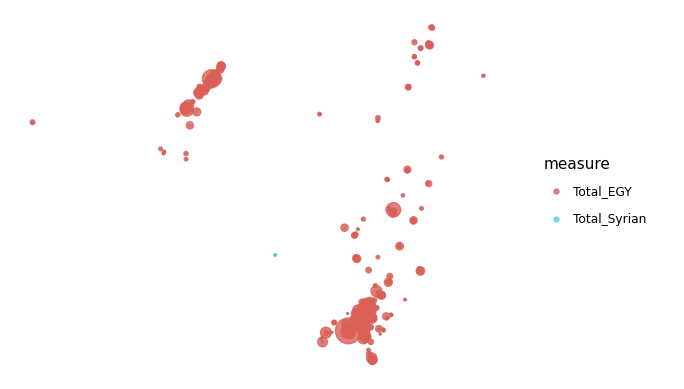

<ggplot: (319487997)>

In [7]:
(
ggplot(schools_reshp, 
       aes(x='Lng', y='Lat', size='value', color='measure')) 
        + geom_point(alpha=.8)
        + scale_size_radius([.2,10], guide=False)
        +theme_void()
        + theme(legend_position=None)
    
    
)

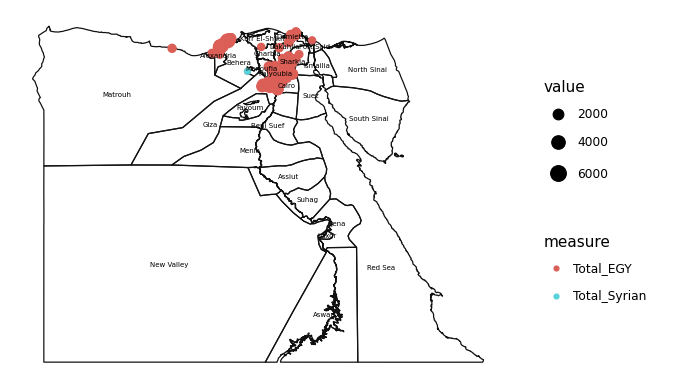

<ggplot: (319265175)>

In [8]:
(ggplot() 
 + geom_map(egypt, fill=None) + theme_void()
 + geom_point(schools_reshp, aes(x='Lng', y='Lat', size='value', color='measure'))
 + geom_text(
     egypt,
     aes('x', 'y', label='ADM1_EN'),
     size=5,
     #fontweight='bold'
 )
)